<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/climate_sensitivity_intro_diagram.png?raw=true" alt="banner" width="40%">


# <font color='red'><b> Climate Sensitivity </b>
General idea:
> *How does the Earth's surface temperature $T_s$ change in response to a radiative forcing $\Delta Q$ at the top of the atmosphere? $\Rightarrow \lambda_R = \frac{\Delta T_s}{\Delta Q}$*

Often asked more specifically:
> *By how much does the Earth's temperature increase when the amount of $\mathrm{CO}_2$ in the atmosphere doubles? (We denote this value by $\Delta T_{2\times\mathrm{CO}_2}$.)*

## <font color='red'><b> Review of the Global Energy Balance </b>

## <font color='red'><b> No atmosphere: </b>


<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/radiative_balance_earth_no_atmosphere.png?raw=true" alt="banner" width="80%">

where
- $S = \frac{L}{4\pi r_E^2} \approx 1360 \mathrm{\,W\,m}^{-2}$ is the solar constant,
- $\sigma = 5.67 \times 10^{-8}\mathrm{\,W\,m}^{-2}\mathrm{\,K}^{-4}$ is the Stefan-Boltzmann constant,
- $\alpha \approx 0.3$ is the Earth's albedo
- $T_s$ is the surface temperature

If we assume that Earth is in radiative balance ($Q_\text{in} = Q_\text{out}$), we have

\begin{align}
  T_e = \left(\frac{S (1 - \alpha)}{4\sigma} \right)^{1/4} \approx -19 ^\circ\mathrm{C} \approx -2 ^\circ\mathrm{F}.
\end{align}

This is too cold to be the actual surface temperature!

In [1]:
# imports
from IPython.display import display, Markdown
import numpy as np

# specify constants
S = 1360.  # Solar constant, W / m^2
sigma = 5.67e-8  # Stefan-Boltzmann constant W / (m^2 K^4)

# temperature conversions
def k2f(k):
    return (k - 273.15) * 9/5 + 32
def k2c(k):
    return (k - 273.15)

# function to calculate temperature
def get_Te(alpha=0.3, S=S, sigma=sigma, verbose=False):
  T = (S * (1 - alpha) / (4 * sigma)) ** (1 / 4)
  if verbose:
    display(Markdown(r'**The surface temperature is $%.0f ^\circ\mathrm{C}$ / $%.0f \mathrm{\,K}$ / $%.0f ^\circ\mathrm{F}$.**' % (k2c(T), T, k2f(T))))
  return T

T_e = get_Te(verbose=True);

**The surface temperature is $-19 ^\circ\mathrm{C}$ / $255 \mathrm{\,K}$ / $-2 ^\circ\mathrm{F}$.**

## <font color='red'><b> A simple greenhouse model: </b>

Add an atmosphere into the model that absorbs all outgoing longwave radiation and emits in all directions.

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/radiative_balance_earth_opaque_atmosphere.png?raw=true" alt="banner" width="50%">

Here we find (Marshall & Plumb, 2.3.1) that
\begin{align}
    T_s = 2^{1/4} T_e \approx 30^\circ\mathrm{C} \approx 85^\circ\mathrm{F}.
\end{align}

Now, this is too hot!



In [2]:
T_s = 2**(1/4) * T_e
display(Markdown(r'**The surface temperature is $%.0f ^\circ\mathrm{C}$ / $%.0f \mathrm{\,K}$ / $%.0f ^\circ\mathrm{F}$.**' % (k2c(T_s), T_s, k2f(T_s))))

**The surface temperature is $30 ^\circ\mathrm{C}$ / $303 \mathrm{\,K}$ / $85 ^\circ\mathrm{F}$.**

## <font color='red'><b> A "leaky" greenhouse: </b>

Now, the atmosphere only absorbs a fraction $\varepsilon$ of the outgoing longwave radiation. We call $\varepsilon$ the **absorptivity** of the atmosphere.

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/radiative_balance_earth_leaky_greenhouse.png?raw=true" alt="banner" width="50%">


In this case we find (Marshall & Plumb, 2.3.2) that
\begin{align}
    T_s = \left( \frac{2}{2-\varepsilon} \right)^{1/4} T_e.
\end{align}

To tune this to the average surface temperature that we see on Earth, we can set $T_s^\text{(earth)} = 288 \mathrm{\,K}$ and solve for
\begin{align}
    \varepsilon_0 = 2 \left(1-\left(\frac{T_e}{T_s^\text{(earth)}}\right)^4\right) \approx 0.78.
\end{align}

In [3]:
T_s_earth = 288
epsilon_tuned = 2 - 2 * (T_e / T_s_earth)**4

def get_Ts_from_Te(T_e, epsilon=epsilon_tuned):
    return (2 / (2 - epsilon)) ** (1 / 4) * T_e

T_s = get_Ts_from_Te(T_e = get_Te(alpha=0.3), epsilon=epsilon_tuned)
display(Markdown(r'**If we let $\varepsilon=\varepsilon_0\approx%.5g$, the surface temperature is $%.1f ^\circ\mathrm{C}$ / $%.1f \mathrm{\,K}$ / $%.1f ^\circ\mathrm{F}$.**' % (epsilon_tuned, k2c(T_s), T_s, k2f(T_s))))

**If we let $\varepsilon=\varepsilon_0\approx0.77974$, the surface temperature is $14.9 ^\circ\mathrm{C}$ / $288.0 \mathrm{\,K}$ / $58.7 ^\circ\mathrm{F}$.**

Now, if we increase $\varepsilon$, we "trap" more radiation inside the atmosphere. This means the surface temperature will increase.

### Relationship between absorptivity and $\mathrm{CO}_2$ in the atmosphere.

The additional amount of outgoing longwave radiation that is trapped inside the atmosphere if we increase $\varepsilon$ from $\varepsilon_0$ to $\varepsilon_1$ is given by
\begin{align}
    \Delta Q = \sigma T_s^\text{earth} \frac{\varepsilon_{2\times\mathrm{CO}_2} - \varepsilon_0}{2}.
\end{align}

This is the change to the total radiative flux at the top of the atmosphere, which we refer to as "radiative forcing". To relate our atmospheric absorptivity parameter $\varepsilon$ to a doubling in $\mathrm{CO}_2$ we use the fact that the corresponding radiative forcing is
\begin{align}
    \Delta Q_{2\times\mathrm{CO}_2} \approx 3.7 \text{ to } 4 \mathrm{\,W\,m}^2.
\end{align}
Using this, we can calculate the change in atmospheric absorptivity that we need in our model to obtain a radiative forcing equal to $\Delta Q_{2\times\mathrm{CO}_2}$:
\begin{align}
    \Delta \varepsilon_{2\times\mathrm{CO}_2} =  \varepsilon_{2\times\mathrm{CO}_2} - \varepsilon_0 =
    \frac{2 \Delta Q_{2\times\mathrm{CO}_2}}{\sigma T_s^\text{earth}} \approx 0.02.
\end{align}

In [4]:
deltaR_2xCO2 = 3.9  # pick a value in the given range
delta_epsilon_2xCO2 = 2 * deltaR_2xCO2 / (sigma * T_s_earth**4)
epsilon_new = epsilon_tuned + delta_epsilon_2xCO2
display(Markdown(r'**$\Delta\varepsilon_{2\times\mathrm{CO}_2}\approx%.4g$, which gives an atmospheric absorptivity of $\varepsilon_{2\times\mathrm{CO}_2}\approx%.3g$ after doubling $\mathrm{CO}_2$.**' % (delta_epsilon_2xCO2, epsilon_new)))

**$\Delta\varepsilon_{2\times\mathrm{CO}_2}\approx0.02$, which gives an atmospheric absorptivity of $\varepsilon_{2\times\mathrm{CO}_2}\approx0.8$ after doubling $\mathrm{CO}_2$.**

### Now calculate the equilibrium climate sensitivity: Change in temperature from a doubling in atmospheric $\mathrm{CO}_2$:

In [5]:
T_s_new = get_Ts_from_Te(T_e = get_Te(alpha=0.3), epsilon=epsilon_new)
display(Markdown(r'**If we increase absorptivity to $\varepsilon=%.3g$, the surface temperature is $%.1f ^\circ\mathrm{C}$ / $%.1f \mathrm{\,K}$ / $%.1f ^\circ\mathrm{F}$.**' % (epsilon_new, k2c(T_s_new), T_s_new, k2f(T_s_new))))
display(Markdown(r'**$\rightarrow$ The increase in absorptivity $\varepsilon$ results in a temperature increase of $\Delta T_{2\times\mathrm{CO}_2} = %.1f^\circ\mathrm{C}$.**' % (T_s_new - T_s)))

**If we increase absorptivity to $\varepsilon=0.8$, the surface temperature is $16.0 ^\circ\mathrm{C}$ / $289.2 \mathrm{\,K}$ / $60.9 ^\circ\mathrm{F}$.**

**$\rightarrow$ The increase in absorptivity $\varepsilon$ results in a temperature increase of $\Delta T_{2\times\mathrm{CO}_2} = 1.2^\circ\mathrm{C}$.**

### What have we done so far?
<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/loops_reference.png?raw=true" alt="banner" width="30%">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/initial-warming.jpg?raw=true" alt="banner" width="30%">


## <font color='red'><b> What happens if albedo is dependent on temperature? </b>

When the surface temperture increases due to an increased absorptivity (i.e. more $\mathrm{CO}_2$ in the atmosphere), we expect more ice and snow to melt. This, in turn will mean that less sunlight is reflected away from the earth $\Rightarrow$ the albedo of earth will decrease. The increased surface absorption of radiation means that temperature increases even. This causes more snow and ice to melt, and so on...

Since the temperature change due to an initial forcing creates an additional forcing, we call this a **"feedback loop"**:

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/feedbacks-icealbedo.png?raw=true" alt="banner" width="40%">

Let's define this temperature-dependent albedo as:

\begin{align}
\alpha(T) = \left\{ \begin{array}{ccc}
\alpha_i & \mathrm{if}  & T \le T_i \\
\alpha_o + (\alpha_i-\alpha_o) \frac{(T-T_o)^2}{(T_i-T_o)^2} &  \mathrm{if} & T_i < T < T_o \\
\alpha_o &  & \mathrm{otherwise.}  \end{array} \right\}
\end{align}

where

- $\alpha_o = 0.25$ is the albedo of a warm, ice-free planet
- $\alpha_i = 0.95$ is the albedo of a very cold planet, completely covered in snow and ice
- $T_o = 295 \mathrm{\,K}$ is the threshold temperature above which we assume the planet is ice-free
- $T_i \approx 268.8 \mathrm{\,K}$ is the threshold temperature below which we assume the planet is completely ice covered.

*Note: these albedo values are totally not accurate and were chosen for illustration purposes only!*

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/earth_temperature_albedo.jpg?raw=true" alt="banner" width="70%">



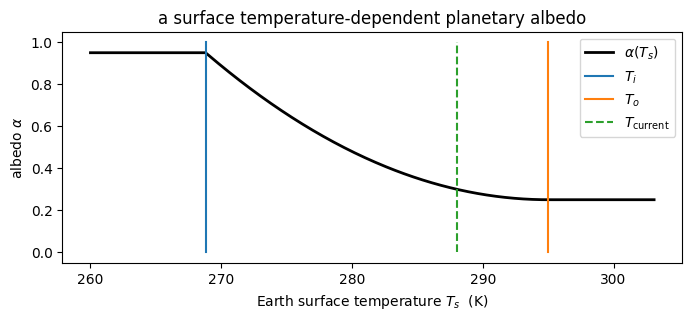

In [6]:
def albedo(T, alpha_o=0.25, alpha_i=0.95, To=295., Ti=268.8083981781207):
    try:
        T = np.array(T)
        alb = alpha_o + (alpha_i-alpha_o)*(T-To)**2 / (Ti - To)**2
        alb[T<Ti] = alpha_i
        alb[T>To] = alpha_o
        return alb
    except:
        alb = alpha_i if T<Ti else alpha_o + (alpha_i-alpha_o)*(T-To)**2 / (Ti - To)**2
        if T>To: alb = alpha_o
    return alb

import matplotlib.pyplot as plt
T_array = np.arange(260, 303.1, 0.1)
fig, ax = plt.subplots(figsize=[8,3])
ax.plot(T_array, albedo(T_array), 'k-', lw=2, label=r"$\alpha(T_s)$")
ax.plot([268.8083981781207]*2, [0,1], color='C0', label=r"$T_i$")
ax.plot([295]*2, [0,1], color='C1', label=r"$T_o$")
ax.plot([288]*2, [0,1], color='C2', ls='--', label=r"$T_\mathrm{current}$")
ax.set_title("a surface temperature-dependent planetary albedo")
ax.set_ylabel(r"albedo $\alpha$")
ax.set_xlabel(r"Earth surface temperature $T_s$  $(\mathrm{K})$")
ax.legend(loc="upper right");

In our model, $T_s$ is calculated using the albedo, but the albedo is itself dependent on $T_s$:
\begin{align}
    T_s &= \left( \frac{2}{2-\varepsilon} \right)^{1/4} T_e \\
    &= \left(\frac{2 S (1 - \alpha(T_s))}{(2-\varepsilon)4\sigma} \right)^{1/4}.
\end{align}
This means that we need to iteratively re-caclulate the surface temperature and albedo until the result converges.

In [7]:
S = 1360.  # Solar constant, W / m^2
sigma = 5.67e-8  # Stefan-Boltzmann constant W / (m^2 K^4)
# epsilon_tuned = 0.7797355959567022

def get_Ts(alpha=0.3, epsilon=epsilon_tuned, S=S, sigma=sigma):
    T_e = (S * (1 - alpha) / (4 * sigma)) ** (1 / 4)
    return (2 / (2 - epsilon)) ** (1 / 4) * T_e

def solve_for_T(T0=288, epsilon=epsilon_tuned, tol=1e-5, max_iter=1000):
    T_old = T0
    i = 0
    diff = tol + 1
    while (diff > tol) & (i < max_iter):
        i += 1
        T_new = get_Ts(alpha=albedo(T_old), epsilon=epsilon)
        diff = np.abs(T_new - T_old)
        T_old = T_new
        if i == (max_iter):
            print("Warning: solve_for_T computation did not converge to desired tolerance.")
            print(diff)
    return T_new

<font color='red'><b> Increase absorptivity to $\varepsilon_{2\times\mathrm{CO}_2} \approx 0.8$ while albedo  $\alpha(T_s)$ changes based on surface temperature. How much does the surface temperature increase in equilibrium? </b>

In [8]:
T0fix = get_Ts()
T1fix = get_Ts(epsilon=epsilon_new)
T0var = solve_for_T()
T1var = solve_for_T(epsilon=epsilon_new)
dtfix = T1fix - T0fix
dtvar = T1var - T0var

display(Markdown(r"""
<table style="border: 1px solid black; border-collapse:collapse;">
 <tr><th colspan="2">&nbsp;</th><th colspan="2">albedo</th></tr>
 <tr><th colspan="2">&nbsp;</th><th>$\alpha=0.3$ (fixed)</th><th>$\alpha(T_s)$ temperature-dependent</th></tr>
 <tr><th rowspan="2">absorptivity</th><th>$\varepsilon_0$ (current)</th><td>$T_0 = %.1f\mathrm{\,K}$</td><td>$T_0 = %.1f\mathrm{\,K}$</td></tr>
 <tr><th>$\varepsilon_{2\times\mathrm{CO}_2}$ (double $\mathrm{CO}_2$)</th><td>$T_{2\times\mathrm{CO}_2} = %.1f\mathrm{\,K}$</td><td>$T_{2\times\mathrm{CO}_2} = %.1f\mathrm{\,K}$</td></tr>
 <tr><th colspan="2">climate sensitivity</th><td>$\Delta T_{2\times\mathrm{CO}_2} = %.1f\mathrm{\,K}$</td><td><font color='red'><b>$\Delta T_{2\times\mathrm{CO}_2} = %.1f\mathrm{\,K}$</b></font></td></tr>
</table>
""" % (T0fix, T0var, T1fix, T1var, dtfix, dtvar)
))


<table style="border: 1px solid black; border-collapse:collapse;">
 <tr><th colspan="2">&nbsp;</th><th colspan="2">albedo</th></tr>
 <tr><th colspan="2">&nbsp;</th><th>$\alpha=0.3$ (fixed)</th><th>$\alpha(T_s)$ temperature-dependent</th></tr>
 <tr><th rowspan="2">absorptivity</th><th>$\varepsilon_0$ (current)</th><td>$T_0 = 288.0\mathrm{\,K}$</td><td>$T_0 = 288.0\mathrm{\,K}$</td></tr>
 <tr><th>$\varepsilon_{2\times\mathrm{CO}_2}$ (double $\mathrm{CO}_2$)</th><td>$T_{2\times\mathrm{CO}_2} = 289.2\mathrm{\,K}$</td><td>$T_{2\times\mathrm{CO}_2} = 294.2\mathrm{\,K}$</td></tr>
 <tr><th colspan="2">climate sensitivity</th><td>$\Delta T_{2\times\mathrm{CO}_2} = 1.2\mathrm{\,K}$</td><td><font color='red'><b>$\Delta T_{2\times\mathrm{CO}_2} = 6.2\mathrm{\,K}$</b></font></td></tr>
</table>


Based on our (simplified) energy balance model, we have calculated the equilibrium climate sensitivity for our reference system, and for a system that includes an ice-albedo feedback. The ice-albedo feedback reinforces the initial forcing, and therefore acts to increase the climate sensitivity.

<table>
<tr>
<td><img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/loops_reference.png?raw=true" alt="banner" height="200px"></td>
<td><img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/loops_icealbedo_caption.png?raw=true" alt="banner" height="200px"></td>
</tr>
<tr>
<th><font size='4vw'><b>$\Delta T_{2\times\mathrm{CO}_2} \approx 1.2 \mathrm{\,K}$</th>
<th><font size='4vw'><b>$\Delta T_{2\times\mathrm{CO}_2} \approx 6.2 \mathrm{\,K}$</th>
</tr>
</table>

# <font color='red'><b> More feedbacks add up! </b>

There are many ways in which the climate system responds to a forcing. All the different feedbacks within the sytem add up to affect the total climate sensitivity. Individual feedbacks can be <font color='red'>positive/destabilizing</font> or <font color='blue'>negative/stabilizing</font>.

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/feedbacks-stabilizing-destabilizing.png?raw=true" alt="banner" width="80%">

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/feedbacks_overview.jpg?raw=true" alt="banner" width="80%">



## <font color='red'><b> Water Vapor Feedback </b></font>

The water vapor feedback is based on the <b>Greenhouse effect</b>: Water vapor very efficiently absorbs outgoing longwave radiation and reemits infrared radiation in all directions. Similarly to an increase of $\mathrm{CO}_2$ in the atmosphere, this traps heat in the atmosphere and makes the Earth warmer. This is a <font color='red'>positive/destabilizing</font> feedback.

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/greenhouse-effect.png?raw=true" height=250px> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/feedbacks-watervapor.png?raw=true" height=250px>


**Forcing:** Increased $\mathrm{CO}_2$ in the atmosphere (usually by humans)
- *CAUSE:* $\mathrm{CO}_2$ released into the atmosphere
- *MECHANISM:* more $\mathrm{CO}_2$ in the atmosphere enhances the greenhouse effect
- *EFFECT:* a warmer atmosphere

**Feedback:**  Increased water vapor in the atmosphere
- *CAUSE:* a warmer atmosphere can hold more water vapor (Clausius-Clapeyron relation $e_s = Ae^{BT}$!)
- *MECHANISM:* more water vapor in the atmosphere enhances the greenhouse effect
- *EFFECT:* an even warmer atmosphere




## <font color='red'><b> Lapse Rate Feedback </b></font>

- emission of infrared radiation varies with temperature
- longwave radiation escaping to space from the relatively cold upper atmosphere is less than that emitted toward the ground from the lower atmosphere
- global warming will likely result in a decrease of the lapse rate, and will therefore usually be a <font color='blue'>negative/stabilizing</font> feedback


<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/feedbacks-lapserate_negative.png?raw=true" height=250px>

*Caveat*: This does often not apply the polar regions, where there are strong temperature inversions. The feedback <font color='red'>can be positive in polar regions</font> and contribute to *polar amplification*. More on that in the next lecture...



## <font color='red'><b> Cloud Feedbacks </b></font>

Clouds can affect the radiative balance in multiple ways:
- they can reflect incoming sunlight (increase albedo) $\rightarrow$ cooling effect
- they can absorb/re-emit longwave radiation (enhanced greenhouse) $\rightarrow$ warming effect

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/clouds_positive.png?raw=true" height=250px> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/clouds_negative.png?raw=true" height=250px>

**Cloud thickness:**
Thick clouds have a greater effect on the albedo  
Cloud height

**Cloud height:**
Higher clouds have a greater effect on the outgoing radiation at the top of the atmosphere
<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/clouds_high_low.jpg?raw=true" height=250px>


$\rightarrow$ high, thin clouds have a warming effect<br>
$\rightarrow$ low, thick clouds have a cooling effect

- How clouds change due to changes in the climate can lead to <font color='red'>positive</font> or <font color='blue'>negative</font> feedbacks
- The effect of cloud feedbacks is still *highly uncertain*


## <font color='red'><b> IPCC best estimates </b></font>

### Climate feedback estimates
<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/ipcc-feedbacks.png?raw=true" width=80%>

### Equilibrium climate sensitivity estimates
<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/ipcc-sensitivity.png?raw=true" width=80%>





# <font color='red'><b> Main Takeaways </b></font>
- How much the Earth's temperature changes in response to
forcing is known as the climate sensitivity.
-We can calculate the climate sensitivity for a reference
system as the change in surface temperature per change in
forcing
- Feedbacks respond to changes in temperature and alter the
total forcing
- A <font color='red'>positive</font>/<font color='blue'>negative</font> feedback <font color='red'>amplifies</font>/<font color='blue'>de-amplifies</font> the
forcing perturbation, <font color='red'>increasing</font>/<font color='blue'>decreasing</font> the Earth's
response
- The major feedbacks in the Earth's climate system are:
  - surface albedo feedback
  - water vapor feedback
  - lapse rate feedback
  - cloud feedbacks